<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Python: Visualizing your data with Matplotlib
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 1: Topic 3</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### Visualization

Conveys information to yourself or others! 

- Should allow one to see structure in data clearly:
    - Structure = trends, comparisons, groupings, signature features.
<br>
<br>
- Choosing the right plot:
    - What type of structure are you trying to represent?
    


- Purpose:
    - What are you trying to show?
    - Quantitative? 
    - Qualitative?



    


- Informative:
    - Structure apparent upon a glance.
    - Scales should be appropriate and apparent. 
    - Quantitative: numbers can be read off.

- Clear:
    - Not too much info/clutter!
    - Legibility and labeling.
    - Color, size, shape: use contrast to convey information.

What's wrong with this? 
<br>
<br>
 <div align>
    <center><img src="Images/CDC.png" align = "center" /></center>
</div>

What's wrong with this? 
<br>
<br>
 <div align>
    <center><img src="Images/yscalebad.png" align = "center" width = 600/></center>
</div>

The true scale.

 <div align>
    <center><img src="Images/yscalegood.png" align = "center" width = 600/></center>
</div>

Was difference meaningful? Error bar? 
- If meaningful, want to highlight **difference**.

Stacked bar charts:

<br>
<br>
 <div align>
    <center><img src="Images/diagnoses.jpg" align = "center" width = 600/></center>
</div>

What is the purpose of this plot?

Eye is good at judging linear measures and bad at judging relative areas -- particularly ones related to angles.
 <div align>
    <center><img src="Images/piechart.png" align = "center" width = 400/></center>
</div>
Sometimes ask yourself whether a table will serve you better.

Oh hell no...
<br>
<br>
 <div align>
    <center><img src="Images/kanye.jpeg" align = "center" width = 500 /></center>
</div>



Plot comparison (not great vs. good):

 <div align>
    <center><img src="Images/handlength_bar.png" align = "center" width = 600 /></center>
</div>

 <div align>
    <center><img src="Images/handlength_scatter.png" align = "center" width = 600 /></center>
</div>

An excellent resource on how to do things right:

 <div align>
    <center><img src="Images/tuftee.jpg" align = "center" width = 400 /></center>
</div>

With above considerations of visualization in mind:

#### Matplotlib: the mother of all Python visualization 

- Can do pretty much anything regarding visualization in Python.
- Focus on tip of iceberg: basic plotting functions.
    - pyplot
    

<div align>
    <center><img src="Images/mpl_logo.png" align = "center" /></center>
</div>

<img src="Images/matplotlib_anatomy.png" width = 600>

__Figure__ - This is the "sheet of paper" all of your graphing sits on. 

__Axis__ - An axis is an individual plot. You can have multiple axes on one figure

__Major/Minor Ticks__ - The large and small dashes on the x and y axis

__Markers__ - In a scatter plot each of the points is refered to as a marker

__Spines__ - The lines that bound each axis

#### Pyplot frameworks

- Many different ways to create plots:
    - plt.plot() framework: really easy, but not flexible.
    - plt.subplots() methods: balance of flexibility/abstraction and ease.


#### plt.subplots()

- Can make single or multiple plots:
    - Multiple plotting:
        - Different types of plots
        - Grid formation
- Flexibility in styling/legend customization

#### How subplots works:

plt.subplots() -- generates a Figure and Axes framework for you. 

fig, ax = plt.subplots()



- fig is a Figure object.
- ax is an an Axes object (or an array of Axes objects)
    - .plot() method creates the plot for the Axes object.

Let's see subplots in action for a single plot:

In [43]:
# import the pyplot from matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

Now, let's load in a fun dataset.

#### Identifying prokaryotes using Raman spectroscopy.
<br>
<br>
 <div align>
    <center><img src="Images/prokaryote.jpg" align = "center" width = 350 /></center>
</div>
<br>
- Measures wavelength shift of laser light due to vibrational absorption of molecules:

**Plotting:**

Normalized counts at a given wavelength shift

Load in spectrum data (a little annoying in base python):

In [2]:
import csv

# we are just going to extract one spectrum. don't worry too much about these processing details.

# in the end we will have Raman intensity (Y) vs Raman shift in inverse wavelength (X):

with open('Data/raman_spectroscopy.csv') as f:
    read_obj = csv.reader(f, delimiter = ',')
    
    # extract X-axis (inverse wavelength)
    col_names = next(read_obj)[1::]
    inverse_wavelength = [float(k.strip('cm-1')) for k in col_names]
    first_spectrum = [float(x) for x in next(read_obj)[1::]]
    
    spectrum_tupled = sorted(zip(inverse_wavelength, first_spectrum))[200::]
    X, Y = list(zip(*spectrum_tupled))

In [3]:
print('X (inverse_wavelength): ' + str(X[:20]) + '...')
print('Y (intensity): ' + str(Y[:20]) + '...')

X (inverse_wavelength): (281.0, 282.0, 284.0, 285.0, 287.0, 288.0, 289.0, 291.0, 292.0, 294.0, 295.0, 296.0, 298.0, 299.0, 301.0, 302.0, 303.0, 305.0, 306.0, 308.0)...
Y (intensity): (0.4097, 0.4358, 0.3296, 0.3862, 0.2905, 0.337, 0.3428, 0.369, 0.2834, 0.452, 0.2139, 0.545, 0.2969, 0.262, 0.2375, 0.3655, 0.3408, 0.2351, 0.3325, 0.43)...


Want lineplot of Y vs. X:

- Spectra: example of data with continuity.
- Values are highly correlated with preceding and following values.
- Other examples? 
    - Time series.

Let's do this with subplots!

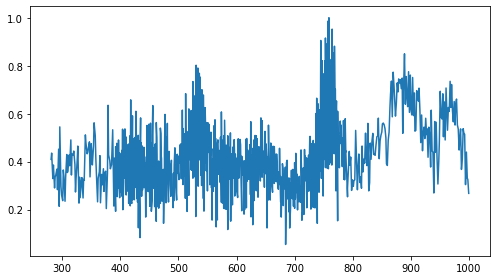

In [10]:
fig, ax = plt.subplots(figsize=(7,4))

#by default, line plot. First argument is X list/array.
# Second argument is Y list/array.
ax.plot(X, Y) 

plt.tight_layout()
plt.show()

What's the problem with this plot?

#### Setting axis labels, title:

More ax object methods:
- .set_xlabel()
- .set_ylabel()
- .set_title()


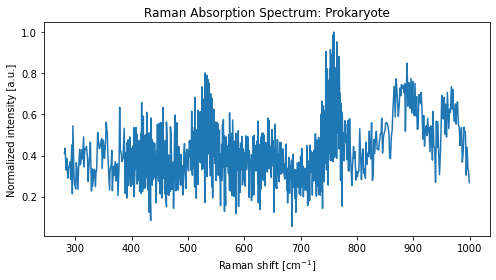

In [11]:
fig, ax = plt.subplots(figsize=(7,4))

ax.plot(X, Y) 

# set axis labels and title
ax.set_xlabel('Raman shift [cm$^{-1}$]')
ax.set_ylabel('Normalized intensity [a.u.]')
ax.set_title('Raman Absorption Spectrum: Prokaryote')

plt.tight_layout()
plt.show()

#### Basic styling on our plot:

Many styling attributes embedded in:
- .plot()
- .set_xlabel()
- .set_ylabel()
- .set_title()

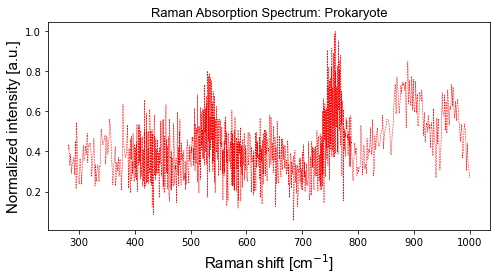

In [23]:
fig, ax = plt.subplots(figsize=(7,4))

ax.plot(X, Y, c ='r', linewidth = 0.5, linestyle = '--') # change color and line width

ax.set_xlabel('Raman shift [cm$^{-1}$]', fontfamily = 'Arial', fontsize = 15)
ax.set_ylabel('Normalized intensity [a.u.]', fontfamily = 'Arial', fontsize = 15)
ax.set_title('Raman Absorption Spectrum: Prokaryote', fontfamily = 'Arial', fontsize = 13)

plt.tight_layout()
plt.show()

What about those ticks?

Yup, ax objects have methods for these:

Can pass in ticks locations and turn on minor ticks
- .set_xticks()
- .set_yticks()

In [26]:
%%capture out 

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(X, Y, c ='r', linewidth = 0.5)
ax.set_xlabel('Raman shift [cm$^{-1}$]', fontsize = 14)
ax.set_ylabel('Normalized intensity [a.u.]', fontsize = 14)
ax.set_title('Raman Absorption Spectrum: Prokaryote', fontsize = 13 )

# ax set_ticks tick placement
ax.set_xticks(range(300,1050,50), minor = True)
ax.set_yticks(np.arange(0,1.1,0.1), minor = True)

plt.show()

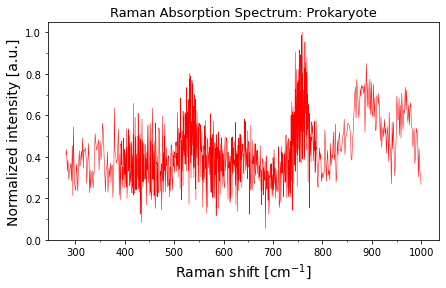

In [10]:
out.show()

Tick options on axes objects (options for tick labels also):

- ax.tick_params()

In [38]:
%%capture out_ticks_styled 

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(X, Y, c ='r', linewidth = 0.5)
ax.set_xlabel('Raman shift [cm$^{-1}$]', fontsize = 14)
ax.set_ylabel('Normalized intensity [a.u.]', fontsize = 14)
ax.set_title('Raman Absorption Spectrum: Prokaryote', fontsize = 13 )
ax.set_xticks(range(300,1050,50), minor = True)
ax.set_yticks(np.arange(0,1.1,0.1), minor = True)

# set tick styling: ticks on all sides, facing in.
#change major and minor tick lengths.
ax.tick_params(bottom = True, top = True, left = True, right = True, 
               labelsize = 13, which='major', direction = 'in', length = 7)
ax.tick_params(bottom = True, top = True, left = True, right = True, 
               which='minor', direction = 'in', length = 4)

plt.show()

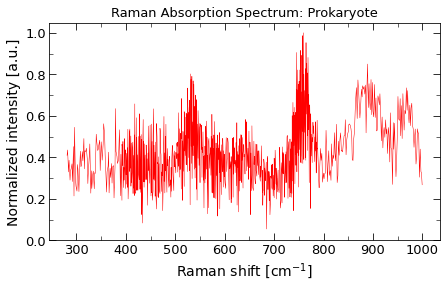

In [39]:
out_ticks_styled.show() # after

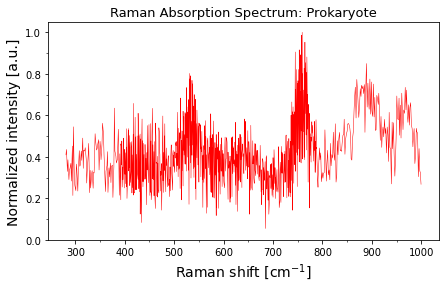

In [40]:
out.show() # before

Labeling ticks:

ax.set_xticklabels() and ax.set_yticklabels()

- Takes in list of labels for each tick
- Styling options

In [44]:
%%capture outticklabels

fig, ax = plt.subplots(figsize=(7,4))
#by default, line plot. First argument is X list/array.
# Second argument is Y list/array.
ax.plot(X, Y, c ='r', linewidth = 0.5)
ax.set_xlabel('Raman shift [cm$^{-1}$]', fontsize = 14)
ax.set_ylabel('Normalized intensity [a.u.]', fontsize = 14)
ax.set_title('Raman Absorption Spectrum: Prokaryote', fontsize = 13 )
ax.set_xticks(range(300,1050,100))
ax.set_yticks(np.arange(0,1.1,0.1))

# ax set_ticks in action: manually relabeling to scientific notation
ax.set_xticklabels([ str(int(x)) + '.0E2' for x in range(3, 11, 1)], fontsize = 12)
ax.set_yticklabels([ str(int(x)) + 'E-1' for x in np.arange(0,11,1) ], fontsize = 12)


plt.show()

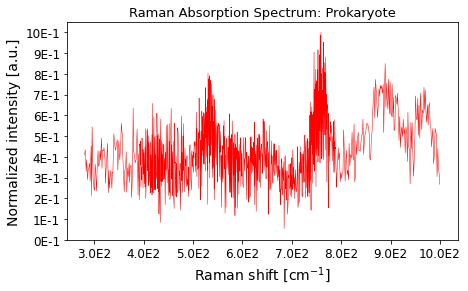

In [45]:
outticklabels.show() # ticks manually labeled

#### Some other plot types for axes objects:
- Scatter plots.
- Histograms.
- Bar plots.
- Box plots.

#### Syntax in matplotlib:
- ax.scatter()
- ax.hist()
- ax.bar()
- ax.boxplot()

Let's see some of these methods in action on a dataset about penguins:
- Body mass
- Flipper length

In [51]:
penguin_dict = {}
with open('Data/penguins.csv') as f:
    masslist = []
    lflipper = []
    species = []
    reader = csv.DictReader(f)
    for row in reader:
        masslist.append(int(row['Body Mass (g)']))
        lflipper.append(int(row['Flipper Length (mm)']))
        species.append(row['Species'])
    penguin_dict['Body Mass (g)'] = masslist
    penguin_dict['Flipper Length (mm)'] = lflipper
    penguin_dict['Species'] = species

Scatter plots are good for visualizing relationships between two continuous numerical attributes:

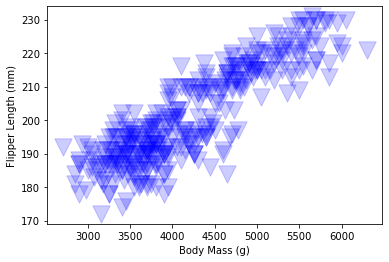

In [55]:
fig, ax = plt.subplots()
ax.scatter(penguin_dict['Body Mass (g)'], penguin_dict['Flipper Length (mm)'] , marker = 'v', s = 300, alpha = 0.2, c = 'b')
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Flipper Length (mm)' )
plt.show()

Histograms can be useful for inspecting how a numerical attribute is distributed:

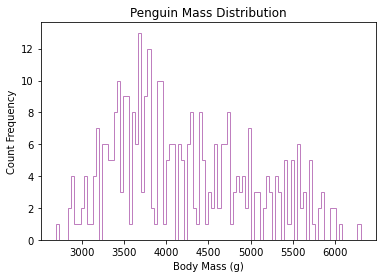

In [76]:
fig, ax = plt.subplots()

ax.hist(penguin_dict['Body Mass (g)'], bins = 100, histtype='step', color = 'purple', alpha = 0.5)

ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Count Frequency' )
ax.set_title('Penguin Mass Distribution')
plt.show()

Bar plots:
- Bar plots are self explanatory.
- But: let's do a bar plot on counts of unique entries in a categorical attribute.
- Known as a count plot.

First, let's get counts of the unique species of penguins in our dataset:

In [77]:
# collections is a really REALLY useful base python package.
# Counter objects have a few nifty methods.
from collections import Counter
species_counter = Counter(penguin_dict['Species'])
print(species_counter)

Counter({'Adelie Penguin (Pygoscelis adeliae)': 151, 'Gentoo penguin (Pygoscelis papua)': 123, 'Chinstrap penguin (Pygoscelis antarctica)': 68})


Prepare x and y for barplot:

In [80]:
species_name = [name.split()[0] for name in species_counter.keys()]
species_count = species_counter.values()

Make the bar plot:
- ax.bar(category_labels, count_values)

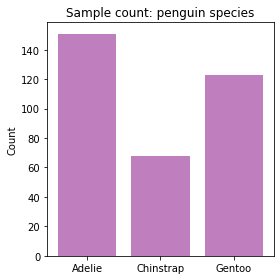

In [86]:
fig, ax = plt.subplots(figsize=(4,4))

# sets up bar plot
ax.bar(species_name, species_count, color = "purple", alpha = 0.5)
ax.set_ylabel('Count')
ax.set_title('Sample count: penguin species')
plt.tight_layout()
plt.show()

#### Subplot grid

- We often want to plot multiple graphs together.
- matplotlib supports these graphs in single Figure as a grid.

fig, axs = plt.subplots(nrows = 2, ncols = 2)

- axs is a 2D addressable array.
- Each element of axs is an ax object
- axs[0,0]: top left plot.
- axs[1,1]: bottom right plot.

Let's create a 2x2 grid of some penguin data:
- scatter plot of flipper length vs mass
- distribution of flipper length
- distribution of mass
- count for penguin species

In [99]:
%%capture multiple_subplots


fig, axs = plt.subplots(2,2, figsize=(10,8))

axs[0,0].scatter(penguin_dict['Body Mass (g)'],penguin_dict['Flipper Length (mm)'], 
                 marker = 's', s = 60, alpha = 0.6, c = 'b')
axs[0,0].set_xlabel('Body Mass [g]')
axs[0,0].set_ylabel('Flipper length [mm]')

axs[0,1].hist(penguin_dict['Body Mass (g)'], bins = 30, histtype='step', color = 'green')
axs[0,1].set_xlabel('Body Mass [g]')
axs[0,1].set_ylabel('Count')

axs[1,0].bar(species_name, species_count)
axs[1,0].set_ylabel('Count')

axs[1,1].hist(penguin_dict['Flipper Length (mm)'] , bins = 30, histtype='bar', color = 'green')
axs[1,1].set_xlabel('Flipper Length (mm)')
axs[1,1].set_ylabel('Count')

plt.tight_layout()

plt.show()

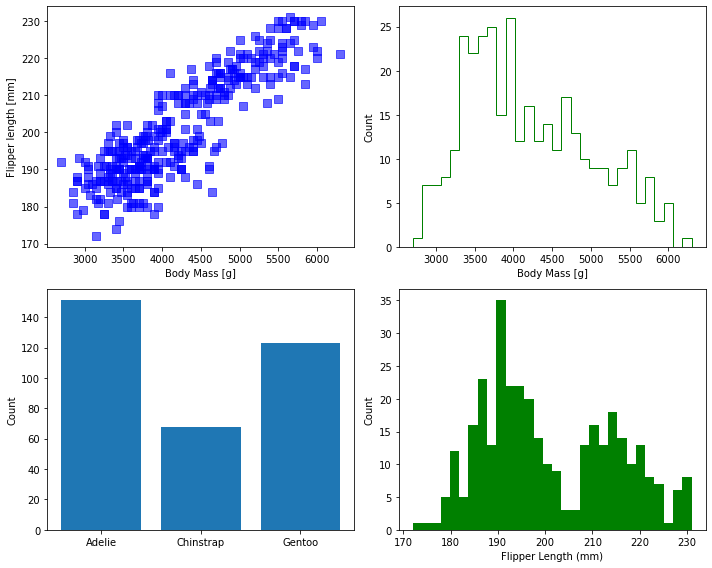

In [100]:
multiple_subplots.show()

There are various styling methods for sharing axis labels, etc:
    
- see matplotlib documentation for the plethora of options on subplots.

#### Additional useful pyplot styling commands

#### Making vertical/horizontal lines 

- .axvline(x = ) 
- .axhline(y = )

In [104]:
%%capture vhlined

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(X, Y, c ='r', linewidth = 0.5)
ax.set_xlabel('Raman shift [cm$^{-1}$]', fontsize = 14)
ax.set_ylabel('Normalized intensity [a.u.]', fontsize = 14)
ax.set_title('Raman Absorption Spectrum: Prokaryote', fontsize = 13 )
ax.set_xticks(range(300,1050,50), minor = True)
ax.set_yticks(np.arange(0,1.1,0.1), minor = True)
ax.tick_params(bottom = True, top = True, left = True, right = True, 
               labelsize = 13, which='major', direction = 'in', length = 7)
ax.tick_params(bottom = True, top = True, left = True, right = True, 
               which='minor', direction = 'in', length = 4)

# make a vertical line: max peak raman shift location
ax.axvline(x =760, c ='b', linewidth = 2, linestyle = '--')

plt.show()

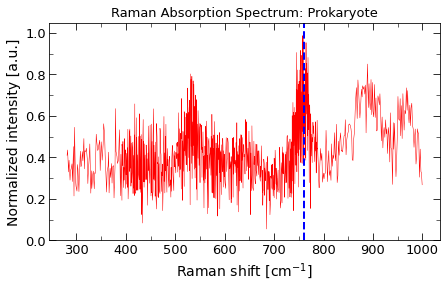

In [102]:
vhlined.show()

#### Annotation
Put text in a plot:
- ax.annote(text, xy_coords, ytextccords)

In [118]:
%%capture annot

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(X, Y, c ='r', linewidth = 0.5)
ax.set_xlabel('Raman shift [cm$^{-1}$]', fontsize = 14)
ax.set_ylabel('Normalized intensity [a.u.]', fontsize = 14)
ax.set_title('Raman Absorption Spectrum: Prokaryote', fontsize = 13 )
ax.set_xticks(range(300,1050,50), minor = True)
ax.set_yticks(np.arange(0,1.1,0.1), minor = True)
ax.tick_params(bottom = True, top = True, left = True, right = True, 
               labelsize = 13, which='major', direction = 'in', length = 7)
ax.tick_params(bottom = True, top = True, left = True, right = True, 
               which='minor', direction = 'in', length = 4)
ax.axvline(x =760, c ='b', linewidth = 2, linestyle = '--')

# annotate peak location
ax.annotate('Peak 1', xy = [750,.9], xytext = [670,.95], fontsize = 12, c = 'b')

plt.show()

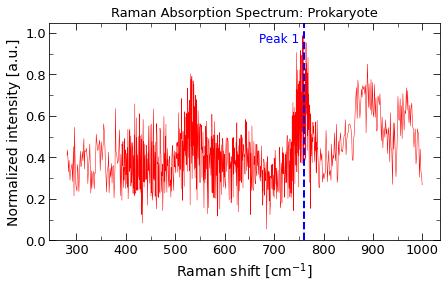

In [119]:
annot.show()

#### Legends

.legend(labels, loc =)

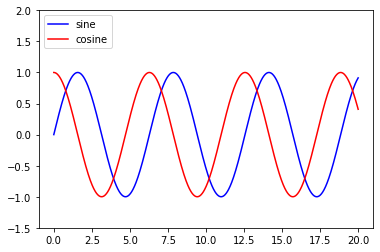

In [141]:
x = np.linspace(0, 20, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots()
ax.plot(x, y1, "-b", label="sine")
ax.plot(x, y2, "-r", label="cosine")
ax.legend(loc="upper left")
ax.set_ylim(-1.5, 2.0)
plt.show()

#### Summary 
- Tip of iceberg 
- Will cover later in course: boxplots, ecdfs, etc.
- Higher level visualization packages built off matplotlib:
    - Pandas plotting
    - Seaborn
    - Plotly
    - Bokeh, ...